## viscosity _ 2bins 50/50 _ lr = 3e-4 _ 30 epochs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import Any, Collection, Dict, List, Optional, Tuple, Union
from numpy.typing import ArrayLike
from fastcore.all import L
import pycm

In [3]:
def evaluate_classification(
    y_true: ArrayLike,
    y_pred: ArrayLike,
) -> Dict[str, Any]:
    """Evaluate a classification task.

    Args:
        y_true (ArrayLike): The true labels.
        y_pred (ArrayLike): The predicted labels.

    Returns:
        Dict[str, Any]: A dictionary of metrics.
    """
    might_have_rounded_floats = False
    assert len(y_true) == len(y_pred), "y_true and y_pred must be the same length."
    y_true = L([int(x) for x in y_true])

    y_pred_new = []
    int_indices = []
    for i, x in enumerate(y_pred):
        try:
            x_int = int(x)
            if x_int != x:
                might_have_rounded_floats = True
                logger.warning("y_pred contains rounded floats.")
            y_pred_new.append(x_int)
            int_indices.append(i)
        except Exception as e:
            y_pred_new.append(None)
    y_pred_new = L(y_pred_new)

    frac_valid = len(int_indices) / len(y_true)
    if len(int_indices) == 0:
        logger.warning("No valid predictions found.")
        y_pred_valid = L([None] * len(y_true))
        y_true_valid = y_true

    else:
        y_true_valid = y_true[int_indices]
        y_pred_valid = y_pred_new[int_indices]

    cm = pycm.ConfusionMatrix(list(y_true_valid), list(y_pred_valid))
    return {
        "accuracy": cm.Overall_ACC,
        "acc_macro": cm.ACC_Macro,
        "racc": cm.Overall_RACC,
        "kappa": cm.Kappa,
        "confusion_matrix": cm,
        "f1_macro": cm.F1_Macro,
        "f1_micro": cm.F1_Micro,
        "frac_valid": frac_valid,
        "all_y_true": y_true,
        "all_y_pred": y_pred,
        "valid_indices": int_indices,
        "might_have_rounded_floats": might_have_rounded_floats,
    }

In [4]:
from glob import glob
from fastcore.xtras import load_pickle
import os 
import pandas as pd
from sklearn import metrics

import matplotlib.pyplot as plt 
import matplotlib as mpl
#import seaborn as sns
import numpy as np 

from scipy.stats import sem
from scipy.constants import golden
ONE_COL_WIDTH_INCH = 3.25
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

import sys

sys.path.append("../plotutils/")
from plotutils import *

plt.style.use("../plotutils/your.mplstyle")

import matplotx

In [5]:
all_res = glob(f"./*.pkl")
print(f"Pickles found: {len(all_res)}")

Pickles found: 30


### ADJUST dictionary according to experiment

In [6]:
all_res

['./20240425-190530_60_42_predictions.pkl',
 './20240425-190531_50_42_predictions.pkl',
 './20240425-190531_80_42_predictions.pkl',
 './20240425-190619_70_42_predictions.pkl',
 './20240425-191010_50_43_predictions.pkl',
 './20240425-191019_60_43_predictions.pkl',
 './20240425-191051_80_43_predictions.pkl',
 './20240425-191200_70_43_predictions.pkl',
 './20240425-191322_50_44_predictions.pkl',
 './20240425-191501_60_44_predictions.pkl',
 './20240425-191630_80_44_predictions.pkl',
 './20240425-191633_70_44_predictions.pkl',
 './20240425-191756_50_45_predictions.pkl',
 './20240425-191811_60_45_predictions.pkl',
 './20240425-192035_70_45_predictions.pkl',
 './20240425-192104_80_45_predictions.pkl',
 './20240425-192110_50_46_predictions.pkl',
 './20240425-192133_70_46_predictions.pkl',
 './20240425-192211_60_46_predictions.pkl',
 './20240425-192252_80_46_predictions.pkl',
 './20240425-192428_50_47_predictions.pkl',
 './20240425-192603_70_47_predictions.pkl',
 './20240425-192612_60_47_predic

In [7]:
compiled_res_list = []
conf_mats = []

for res in all_res:
    res = load_pickle(res)
    nan_prediction_mask = np.isnan(res["predictions"])
    try:
        results = evaluate_classification(res["targets"], res["predictions"][~nan_prediction_mask])
    except:
        results = evaluate_classification(res["true"], res["predictions"][~nan_prediction_mask])
    summary = {
        'train_size': res['train_size'],
        'accuracy': results['accuracy'],
        'acc_macro': results['acc_macro'],
        'racc': results['racc'],
        'kappa': results['kappa'],
        'f1_macro': results['f1_macro'],
        'f1_micro': results['f1_micro'],
        'frac_valid': results['frac_valid'],
        'valid_indices': results['valid_indices'],
        'might_have_rounded_floats': results['might_have_rounded_floats'],
    }
    
    confusion_matrix = {
        'all_y_true': results['all_y_true'],
        'all_y_pred': results['all_y_pred']
    }
    
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)

In [8]:
compiled_res = pd.DataFrame(compiled_res_list)

In [9]:
compiled_res = compiled_res.sort_values(['train_size']).iloc[:, 0:8]
compiled_res

,train_size,accuracy,acc_macro,racc,kappa,f1_macro,f1_micro,frac_valid
29,40,0.650000,0.650000,0.5,0.300000,0.649903,0.650000,1.0
27,40,0.683333,0.683333,0.5,0.366667,0.676044,0.683333,1.0
26,40,0.683333,0.683333,0.5,0.366667,0.676044,0.683333,1.0
25,40,0.733333,0.733333,0.5,0.466667,0.722222,0.733333,1.0
24,40,0.666667,0.666667,0.5,0.333333,0.657143,0.666667,1.0
28,40,0.650000,0.650000,0.5,0.300000,0.626667,0.650000,1.0
1,50,0.700000,0.700000,0.5,0.400000,0.678250,0.700000,1.0
4,50,0.620000,0.620000,0.5,0.240000,0.570330,0.620000,1.0
8,50,0.620000,0.620000,0.5,0.240000,0.570330,0.620000,1.0
20,50,0.740000,0.740000,0.5,0.480000,0.737374,0.740000,1.0


### ADJUST columns according to grouping

In [10]:
grouped_res = compiled_res.groupby(['train_size']).agg(['mean', 'sem'])
grouped_res

accuracy           acc_macro           racc          kappa  \
                mean       sem      mean       sem mean  sem      mean   
train_size                                                               
40          0.677778  0.012669  0.677778  0.012669  0.5  0.0  0.355556   
50          0.646667  0.024585  0.646667  0.024585  0.5  0.0  0.293333   
60          0.708333  0.030732  0.708333  0.030732  0.5  0.0  0.416667   
70          0.766667  0.022771  0.766667  0.022771  0.5  0.0  0.533333   
80          0.800000  0.051640  0.800000  0.051640  0.5  0.0  0.600000   

                      f1_macro            f1_micro           frac_valid       
                 sem      mean       sem      mean       sem       mean  sem  
train_size                                                                    
40          0.025337  0.668004  0.013195  0.677778  0.012669        1.0  0.0  
50          0.049171  0.617062  0.029708  0.646667  0.024585        1.0  0.0  
60          0.061464  0.694096  0.035275  0.708333  0.030732        1.0  0.0  
70          0.045542  0.762456  0.024598  0.766667  0.022771        1.0  0.0  
80          0.103280  0.793233  0.054451  0.800000  0.051640        1.0  0.0

[[0.83333333 0.16666667]
 [0.23333333 0.76666667]]
accuracy: 0.8


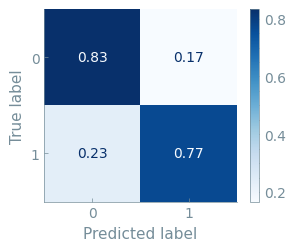

In [11]:
index_maxsize = compiled_res[compiled_res["train_size"]==max(compiled_res["train_size"])].index
conf_mats_max = [conf_mats[i] for i in index_maxsize]
confusion_matrix_max = []
for index, _ in enumerate(conf_mats_max):
    try:
        preds = conf_mats_max[index]
        actual = preds["all_y_true"]
        predicted = preds["all_y_pred"]
        confusion_matrix = metrics.confusion_matrix(actual, predicted)
        confusion_matrix_max.append(confusion_matrix)
    except Exception as e:
        print(e)
norm_confusion_matrix = sum(confusion_matrix_max)/[[sum(sum(confusion_matrix_max)[0])], [sum(sum(confusion_matrix_max)[1])]]
print(norm_confusion_matrix)

acc1=0
for i in range(len(norm_confusion_matrix)):
    acc=norm_confusion_matrix[i][i]
    acc1=acc1+acc
acc=acc1/sum(sum(norm_confusion_matrix))

print(f'accuracy: {acc}')

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = norm_confusion_matrix, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Blues)
plt.savefig('classif_viscosity_confusionMatrix_50_50_30ep_size80.pdf', bbox_inches='tight')

In [12]:
sizes = np.sort(compiled_res["train_size"].unique())
print(sizes)

[40 50 60 70 80]


In [13]:
print(grouped_res.loc[np.sort(sizes), :]['accuracy'])

                mean       sem
train_size                    
40          0.677778  0.012669
50          0.646667  0.024585
60          0.708333  0.030732
70          0.766667  0.022771
80          0.800000  0.051640


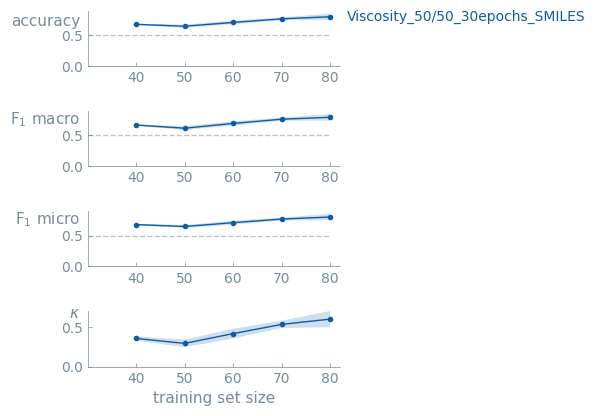

In [14]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

n_bins = 2
representations = ['50/50_30epochs_SMILES']

for representation in representations:
    ax[0].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['accuracy']['mean'],
        marker='o',
        label=f'Viscosity_{representation}'
    )
    ax[0].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['accuracy']['mean']
        -grouped_res.loc[sizes, :]['accuracy']['sem'],
        grouped_res.loc[sizes, :]['accuracy']['mean']
        +grouped_res.loc[sizes, :]['accuracy']['sem'],
        alpha = 0.2
    )
    
    ax[0].hlines(0.9, 30, 30, linestyle='--', color='#758D99', alpha=0.5)
    ax[0].hlines(0.5, 30, 80, linestyle='--', color='#758D99', alpha=0.5)
    ax[0].hlines(0, 80, 82, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top('accuracy', ax=ax[0])
    ax[0].set_xticks(sizes)

    ax[1].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_macro']['mean'],
        marker='o',
        label=f'{representation}'
    )
    ax[1].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_macro']['mean']
        -grouped_res.loc[sizes, :]['f1_macro']['sem'],
        grouped_res.loc[sizes, :]['f1_macro']['mean']
        +grouped_res.loc[sizes, :]['f1_macro']['sem'],
        alpha=0.2
    )

    ax[1].hlines(0.9, 30, 30, linestyle='--', color='#758D99', alpha=0.5)
    ax[1].hlines(0.5, 30, 80, linestyle='--', color='#758D99', alpha=0.5)
    ax[1].hlines(0, 80, 82, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top(r'F$_1$ macro', ax=ax[1])
    ax[1].set_xticks(sizes)

    ax[2].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_micro']['mean'],
        marker='o',
        label=f'{representation}'
    )

    ax[2].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_micro']['mean']
        -grouped_res.loc[sizes, :]['f1_micro']['sem'],
        grouped_res.loc[sizes, :]['f1_micro']['mean']
        +grouped_res.loc[sizes, :]['f1_micro']['sem'],
        alpha=0.2
    )

    ax[2].hlines(0.9, 30, 30, linestyle='--', color='#758D99', alpha=0.5)
    ax[2].hlines(0.5, 30, 80, linestyle='--', color='#758D99', alpha=0.5)
    ax[2].hlines(0, 80, 82, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top(r'F$_1$ micro', ax=ax[2])
    ax[2].set_xticks(sizes)

    ax[3].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['kappa']['mean'],
        marker='o',
        label=f'{representation}'
    )
    ax[3].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['kappa']['mean']
        -grouped_res.loc[sizes, :]['kappa']['sem'],
        grouped_res.loc[sizes, :]['kappa']['mean']
        +grouped_res.loc[sizes, :]['kappa']['sem'],
        alpha=0.2
    )
    
    #ax[3].hlines(0.8, 30, 30, linestyle='--', color='#758D99', alpha=0.5)
    ax[3].hlines(0, 30, 80, linestyle='--', color='#758D99', alpha=0.5)
    ax[3].hlines(0, 80, 82, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top(r'$\kappa$', ax=ax[3])
    ax[3].set_xticks(sizes)

ax[-1].set_xlabel('training set size')

matplotx.line_labels(ax[0])
plt.subplots_adjust(hspace=0.8, top=1, bottom=0.2)
fig.savefig('classif_viscosity_50_50_30ep.pdf', bbox_inches='tight')